In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#The first thing to do is import the data
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

dftrain.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [ ]:
dftrain.shape

(8693, 14)

In [ ]:
dftest.shape

(4277, 13)

In [ ]:
dftrain.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [ ]:
dftrain.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
#Let's see the unique values
print(dftrain['HomePlanet'].value_counts(),'\n')

print(dftrain['CryoSleep'].value_counts(),'\n')

print(dftrain['Destination'].value_counts(),'\n')

print(dftrain['VIP'].value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64 

False    5439
True     3037
Name: CryoSleep, dtype: int64 

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64 

False    8291
True      199
Name: VIP, dtype: int64


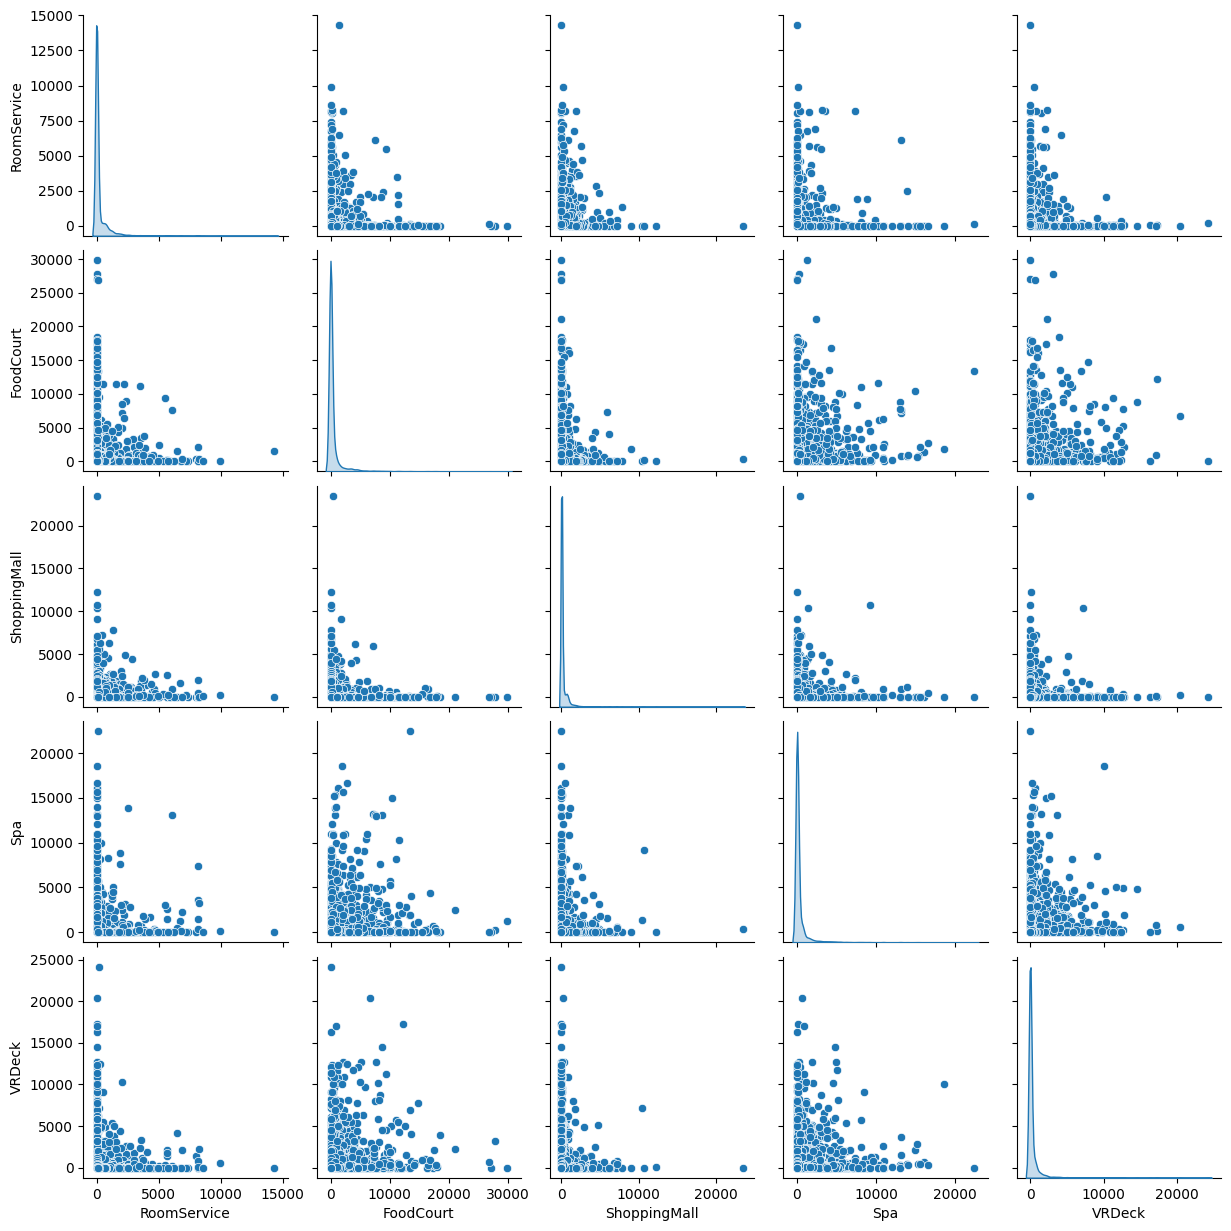

In [ ]:
#Inspect some of the data
analyses = ['RoomService',	'FoodCourt',	'ShoppingMall',	'Spa',	'VRDeck']
sns.pairplot(dftrain[analyses], diag_kind='kde')

In [ ]:
#Now, let's select features and labels:
features = ['HomePlanet','CryoSleep','Cabin','Destination','VIP','Age']

train_features = dftrain[features].copy()
train_features['Spend'] = dftrain['RoomService']+dftrain['FoodCourt']+dftrain['Spa']+dftrain['VRDeck']+dftrain['ShoppingMall']
train_labels = dftrain.pop('Transported')

test_features = dftest[features].copy()
test_features['Spend'] = dftest['RoomService']+dftest['FoodCourt']+dftest['Spa']+dftest['VRDeck']+dftest['ShoppingMall']

In [ ]:
train_features.describe()

,Age,Spend
count,8514.000000,7785.000000
mean,28.827930,1484.601541
std,14.489021,2845.288241
min,0.000000,0.000000
25%,19.000000,0.000000
50%,27.000000,736.000000
75%,38.000000,1486.000000
max,79.000000,35987.000000


In [ ]:
#Fill the na values:
spend_mean = pd.concat([train_features['Spend'], test_features['Spend']], ignore_index=True).mean()
age_mean = pd.concat([train_features['Age'], test_features['Age']], ignore_index=True).mean()

train_features['Age'] = train_features['Age'].fillna(age_mean)
train_features['Spend'] = train_features['Spend'].fillna(spend_mean)

test_features['Age'] = test_features['Age'].fillna(age_mean)
test_features['Spend'] = test_features['Spend'].fillna(spend_mean)

train_features.describe()

,Age,Spend
count,8693.000000,8693.000000
mean,28.826778,1483.126382
std,14.339057,2692.578556
min,0.000000,0.000000
25%,20.000000,0.000000
50%,27.000000,803.000000
75%,37.000000,1470.478677
max,79.000000,35987.000000


In [ ]:
test_features.describe()

,Age,Spend
count,4277.000000,4277.000000
mean,28.660568,1444.772223
std,14.027393,2673.866395
min,0.000000,0.000000
25%,20.000000,0.000000
50%,27.000000,800.000000
75%,37.000000,1470.478677
max,79.000000,33666.000000


In [ ]:
#Separate the age and spend values in 5 categories:
qa = []
qs=[]
for i in range(5):
  qa.append(pd.concat([train_features['Age'], test_features['Age']], ignore_index=True).quantile((i+1)/5))
  qs.append(pd.concat([train_features['Spend'], test_features['Spend']], ignore_index=True).quantile((i+1)/5))

train_features['Age'] = train_features['Age'].apply(lambda a: 4 if a>=qa[4] else 3 if a>= qa[3] else 2 if a>= qa[2] else 1 if a>= qa[1] else 0).astype(int)
print(train_features['Age'].value_counts(), '\n')

test_features['Age'] = test_features['Age'].apply(lambda a: 4 if a>=qa[4] else 3 if a>= qa[3] else 2 if a>= qa[2] else 1 if a>= qa[1] else 0).astype(int)
print(test_features['Age'].value_counts(), '\n')

train_features['Spend'] = train_features['Spend'].apply(lambda a: 4 if a>=qs[4] else 3 if a>= qs[3] else 2 if a>= qs[2] else 1 if a>= qs[1] else 0).astype(int)
print(train_features['Spend'].value_counts(), '\n')

test_features['Spend'] = test_features['Spend'].apply(lambda a: 4 if a>=qs[4] else 3 if a>= qs[3] else 2 if a>= qs[2] else 1 if a>= qs[1] else 0).astype(int)
print(test_features['Spend'].value_counts(), '\n') 

0    3329
3    1856
1    1770
2    1735
4       3
Name: Age, dtype: int64 

0    1681
3     896
1     895
2     803
4       2
Name: Age, dtype: int64 

0    3448
1    1787
3    1763
2    1694
4       1
Name: Spend, dtype: int64 

0    1720
2     901
3     831
1     825
Name: Spend, dtype: int64 



In [ ]:
train_features.describe()

,Age,Spend
count,8693.000000,8693.000000
mean,1.244680,1.204187
std,1.174715,1.167149
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,4.000000,4.000000


In [ ]:
#Turn our attencion to non numerical features:
train_features.describe(include='O')

,HomePlanet,CryoSleep,Cabin,Destination,VIP
count,8492,8476,8494,8511,8490
unique,3,2,6560,3,2
top,Earth,False,G/734/S,TRAPPIST-1e,False
freq,4602,5439,8,5915,8291


In [ ]:
#Convert non numerical values to numerical values
#HomePlanet
train_features['HomePlanet'] = train_features['HomePlanet'].apply(lambda a: 2 if a=='Mars' else 1 if a=='Europa' else 0).astype(int)
print(train_features['HomePlanet'].value_counts(), '\n')

test_features['HomePlanet'] = test_features['HomePlanet'].apply(lambda a: 2 if a=='Mars' else 1 if a=='Europa' else 0).astype(int)
print(test_features['HomePlanet'].value_counts(), '\n')

#CryoSleep
train_features['CryoSleep'] = train_features['CryoSleep'].apply(lambda a: 1 if a==True else 0).astype(int)
print(train_features['CryoSleep'].value_counts(), '\n')

test_features['CryoSleep'] = test_features['CryoSleep'].apply(lambda a: 1 if a==True else 0).astype(int)
print(test_features['CryoSleep'].value_counts(), '\n')

#Destination
train_features['Destination'] = train_features['Destination'].apply(lambda a: 2 if a=='PSO J318.5-22' else 1 if a=='55 Cancri e' else 0).astype(int)
print(train_features['Destination'].value_counts(), '\n')

test_features['Destination'] = test_features['Destination'].apply(lambda a: 2 if a=='PSO J318.5-22' else 1 if a=='55 Cancri e' else 0).astype(int)
print(test_features['Destination'].value_counts(), '\n')

#VIP
train_features['VIP'] = train_features['VIP'].apply(lambda a: 1 if a==True else 0).astype(int)
print(train_features['VIP'].value_counts(), '\n')

test_features['VIP'] = test_features['VIP'].apply(lambda a: 1 if a==True else 0).astype(int)
print(test_features['VIP'].value_counts(), '\n')


0    4803
1    2131
2    1759
Name: HomePlanet, dtype: int64 

0    2350
1    1002
2     925
Name: HomePlanet, dtype: int64 

0    5656
1    3037
Name: CryoSleep, dtype: int64 

0    2733
1    1544
Name: CryoSleep, dtype: int64 

0    6097
1    1800
2     796
Name: Destination, dtype: int64 

0    3048
1     841
2     388
Name: Destination, dtype: int64 

0    8494
1     199
Name: VIP, dtype: int64 

0    4203
1      74
Name: VIP, dtype: int64 



In [ ]:
train_features.describe()

,HomePlanet,CryoSleep,Destination,VIP,Age,Spend
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.649833,0.349362,0.390199,0.022892,1.244680,1.204187
std,0.795183,0.476796,0.648944,0.149568,1.174715,1.167149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000
max,2.000000,1.000000,2.000000,1.000000,4.000000,4.000000


In [ ]:
# It is missing only the 'Cabin' column 
train_features['Cabin'].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

In [ ]:
# We are going to stay only with the deck information
decks = train_features['Cabin'].str[0]
decks.value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin, dtype: int64

In [ ]:
train_features['Cabin'] = decks
test_features['Cabin'] = test_features['Cabin'].str[0]

train_features['Cabin'] = train_features['Cabin'].apply(lambda a: 7 if a=='T' 
                                                        else 6 if a=='A'
                                                        else 5 if a=='D'
                                                        else 4 if a=='C'
                                                        else 3 if a=='B'
                                                        else 2 if a=='E'
                                                        else 1 if a=='G'
                                                        else 0).astype(int)
print(train_features['Cabin'].value_counts(), '\n')
test_features['Cabin'] = test_features['Cabin'].apply(lambda a: 7 if a=='T' 
                                                        else 6 if a=='A'
                                                        else 5 if a=='D'
                                                        else 4 if a=='C'
                                                        else 3 if a=='B'
                                                        else 2 if a=='E'
                                                        else 1 if a=='G'
                                                        else 0).astype(int)
print(test_features['Cabin'].value_counts())

0    2993
1    2559
2     876
3     779
4     747
5     478
6     256
7       5
Name: Cabin, dtype: int64 

0    1545
1    1222
2     447
3     362
4     355
5     242
6      98
7       6
Name: Cabin, dtype: int64


In [ ]:
train_features.describe()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age,Spend
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.649833,0.349362,1.564132,0.390199,0.022892,1.244680,1.204187
std,0.795183,0.476796,1.701678,0.648944,0.149568,1.174715,1.167149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
max,2.000000,1.000000,7.000000,2.000000,1.000000,4.000000,4.000000


In [ ]:
# Adjusting the labels to numeric data:
train_labels = train_labels.apply(lambda a: 1 if a==True else 0).astype(int)
train_labels.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [ ]:
#Reescaling the features:
features += ['Spend']
for f in features:
  max_value = pd.concat([train_features[f], test_features[f]], ignore_index=True).max()
  min_value = pd.concat([train_features[f], test_features[f]], ignore_index=True).min()
  train_features[f] = (train_features[f] - min_value) / (max_value - min_value)
  test_features[f] = (test_features[f] - min_value) / (max_value - min_value)

train_features.describe()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age,Spend
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.324917,0.349362,0.223447,0.195100,0.022892,0.311170,0.301047
std,0.397592,0.476796,0.243097,0.324472,0.149568,0.293679,0.291787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.142857,0.000000,0.000000,0.250000,0.250000
75%,0.500000,1.000000,0.428571,0.500000,0.000000,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_features.describe()

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age,Spend
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,0.333411,0.361001,0.215839,0.189034,0.017302,0.303776,0.299275
std,0.404620,0.480347,0.239882,0.322748,0.130409,0.293365,0.290631
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.142857,0.000000,0.000000,0.250000,0.250000
75%,0.500000,1.000000,0.285714,0.500000,0.000000,0.500000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000


In [ ]:
#Bulding model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)),
    keras.layers.Dense(6, activation='relu', use_bias=True),
    keras.layers.Dense(6, activation='relu', use_bias=True),
    keras.layers.Dense(1, activation='sigmoid', use_bias=True)
])

In [ ]:
#Compiling the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
#Training the model
model.fit(train_features, train_labels, epochs=50)

Epoch 1/50
272/272 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.7399
Epoch 2/50
272/272 [==============================] - 1s 3ms/step - loss: 0.5103 - accuracy: 0.7399
Epoch 3/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.7412
Epoch 4/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5098 - accuracy: 0.7416
Epoch 5/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5095 - accuracy: 0.7401
Epoch 6/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5089 - accuracy: 0.7407
Epoch 7/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5093 - accuracy: 0.7401
Epoch 8/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5088 - accuracy: 0.7397
Epoch 9/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5093 - accuracy: 0.7407
Epoch 10/50
272/272 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.7413

In [ ]:
#Now, let's predict for the test values
predictions = model.predict(test_features)
predictions_surv=[]
#And create a binary list for the predictions
for i in range(len(predictions)):
  if predictions[i][0] > 0.5:
    predictions_surv.append(int(1))
  else:
    predictions_surv.append(int(0))
print(predictions_surv)

134/134 [==============================] - 0s 1ms/step
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
# It's time to create a submission csv
dfsubmission = dftest[['PassengerId']].copy()
dfsubmission['Transported'] = predictions_surv
dfsubmission['Transported'] = dfsubmission['Transported'].apply(lambda a: True if a==1 else False).astype(str)
dfsubmission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [ ]:
dfsubmission.to_csv('submission_pedro.csv', index=False)